In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline


In [5]:
# Cargar el dataset
file_path = 'fish_data.csv'  # Asegúrate de que la ruta al archivo sea correcta
df = pd.read_csv(file_path)

# Información general del dataset
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB

Estadísticas descriptivas:


,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


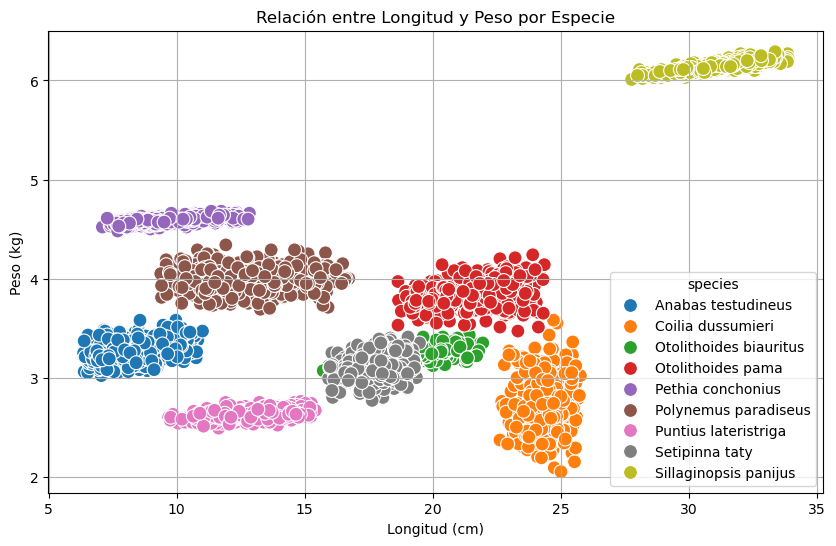

In [6]:
# Verificar si el dataframe se cargó correctamente
if 'df' in locals():
    # Visualización de la relación entre longitud y peso
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='length', y='weight', hue='species', s=100)
    plt.title('Relación entre Longitud y Peso por Especie')
    plt.xlabel('Longitud (cm)')
    plt.ylabel('Peso (kg)')
    plt.grid(True)
    plt.show()
else:
    print("No se pueden generar visualizaciones sin el dataframe cargado.")

In [7]:
if 'df' in locals():
    # Seleccionar las características para el clustering
    X = df[['length', 'weight', 'w_l_ratio']]

    # Escalar los datos (importante para K-Means)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Mostrar los datos escalados
    print("Datos escalados (primeras 5 filas):")
    display(pd.DataFrame(X_scaled, columns=X.columns).head())
else:
    print("No se puede realizar preprocesamiento sin el dataframe cargado.")

Datos escalados (primeras 5 filas):


,length,weight,w_l_ratio
0,-0.940922,-0.278662,0.546351
1,-1.468066,-0.451700,1.765555
2,-1.261425,-0.269049,1.277873
3,-1.375288,-0.365181,1.521714
4,-0.917025,-0.345955,0.465071


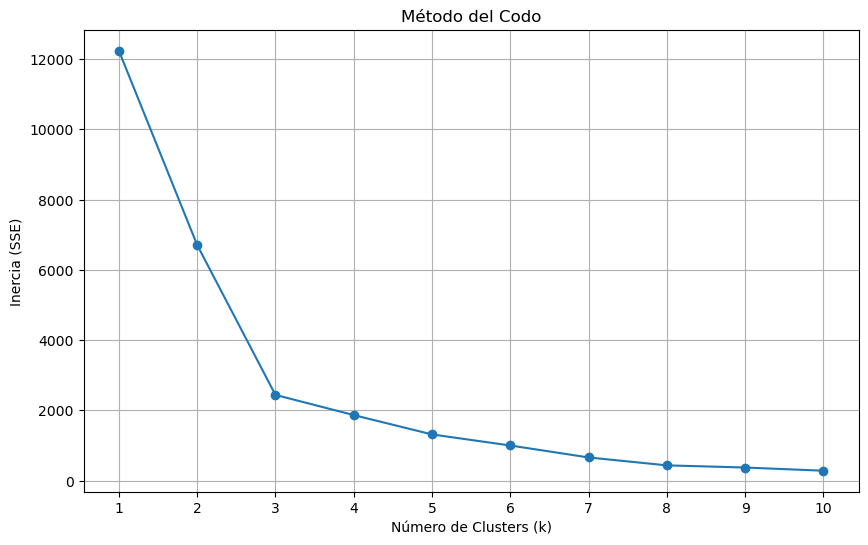

In [8]:
if 'X_scaled' in locals():
    # Calcular la inercia para diferentes valores de k
    inertias = []
    max_k = min(10, len(X_scaled)-1)
    k_range = range(1, max_k+1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Graficar el método del codo (elbow)
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia (SSE)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
else:
    print("No se puede calcular el método del codo sin datos escalados.")

Para k=2, el coeficiente de silueta es 0.484
Para k=3, el coeficiente de silueta es 0.628
Para k=4, el coeficiente de silueta es 0.570
Para k=5, el coeficiente de silueta es 0.492
Para k=6, el coeficiente de silueta es 0.551
Para k=7, el coeficiente de silueta es 0.591
Para k=8, el coeficiente de silueta es 0.655
Para k=9, el coeficiente de silueta es 0.641
Para k=10, el coeficiente de silueta es 0.647


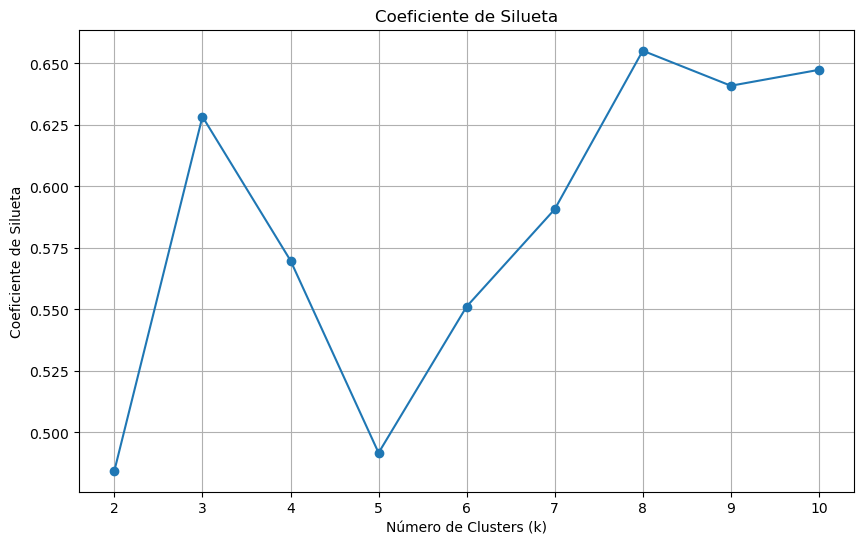

In [9]:
if 'X_scaled' in locals() and len(X_scaled) > 1:
    # Calcular el coeficiente de silueta para diferentes valores de k
    silhouette_scores = []
    max_k_silhouette = min(10, len(X_scaled)-1)  # silhouette necesita al menos 2 clusters

    for k in range(2, max_k_silhouette+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Para k={k}, el coeficiente de silueta es {silhouette_avg:.3f}")

    if len(silhouette_scores) > 0:
        plt.figure(figsize=(10, 6))
        plt.plot(range(2, max_k_silhouette+1), silhouette_scores, marker='o')
        plt.title('Coeficiente de Silueta')
        plt.xlabel('Número de Clusters (k)')
        plt.ylabel('Coeficiente de Silueta')
        plt.xticks(range(2, max_k_silhouette+1))
        plt.grid(True)
        plt.show()
else:
    print("No se puede calcular sin datos escalados o con insuficientes muestras.")

In [10]:
def cluster_with_k(k, data_scaled, original_data):
    # Verificar que k es válido
    if k < 1 or k >= len(data_scaled):
        print(f"Error: k debe estar entre 1 y {len(data_scaled)-1}")
        return None

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Añadir las etiquetas de cluster al dataframe original
    clustered_data = original_data.copy()
    clustered_data['cluster'] = clusters

    # Calcular métricas
    inertia = kmeans.inertia_
    if k > 1:
        silhouette = silhouette_score(data_scaled, clusters)
        print(f"\nMétricas para k={k}:")
        print(f"- Inercia (SSE): {inertia:.3f}")
        print(f"- Coeficiente de Silueta: {silhouette:.3f}")
    else:
        print(f"\nInercia (SSE) para k={k}: {inertia:.3f}")

    # Visualización de los clusters
    plt.figure(figsize=(12, 5))

    # Gráfico: Longitud vs Peso
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=clustered_data, x='length', y='weight',
                    hue='cluster', palette='viridis', s=100)
    plt.title(f'Clusters (k={k}) - Longitud vs Peso')
    plt.xlabel('Longitud (cm)')
    plt.ylabel('Peso (kg)')

    plt.tight_layout()
    plt.show()

    # Mostrar estadísticas por cluster
    print("\nEstadísticas por cluster:")
    display(clustered_data.groupby('cluster').describe())

    return clustered_data


Aplicando clustering con k=3 (óptimo según métricas)

Métricas para k=3:
- Inercia (SSE): 2439.636
- Coeficiente de Silueta: 0.628


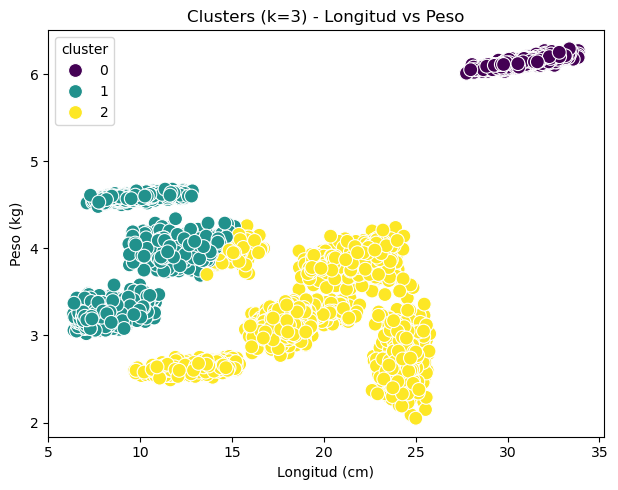


Estadísticas por cluster:


length                                                             \
          count       mean       std    min     25%     50%     75%    max   
cluster                                                                      
0         455.0  31.066923  1.361024  27.75  30.030  31.170  32.090  33.86   
1        1319.0   9.862760  2.072354   6.36   8.215   9.510  11.415  15.13   
2        2306.0  18.932363  3.877016   9.69  16.700  18.505  22.510  25.76   

         weight            ...               w_l_ratio                      \
          count      mean  ...     75%   max     count      mean       std   
cluster                    ...                                               
0         455.0  6.143143  ...  6.1800  6.29     455.0  0.198264  0.007899   
1        1319.0  3.946422  ...  4.5700  4.68    1319.0  0.412578  0.081633   
2        2306.0  3.147541  ...  3.3175  4.26    2306.0  0.172138  0.035571   

                                       
          min   25%   50%   75%   max  
cluster                                
0        0.18  0.19  0.20  0.20  0.22  
1        0.28  0.35  0.41  0.47  0.64  
2        0.08  0.16  0.18  0.19  0.27  

[3 rows x 24 columns]

In [11]:
if 'X_scaled' in locals():
    optimal_k = 3
    print(f"\nAplicando clustering con k={optimal_k} (óptimo según métricas)")

    final_clusters = cluster_with_k(optimal_k, X_scaled, df)
else:
    print("No se puede aplicar clustering sin datos escalados.")

=== Reporte Detallado de los Clusters ===

Características medias de cada cluster:


,length,weight,w_l_ratio,cluster,size
0,31.066923,6.143143,0.198264,0,455
1,9.862760,3.946422,0.412578,1,1319
2,18.932363,3.147541,0.172138,2,2306



Cluster 0: Peces de tamaño grande (31.1 cm) con relación peso/longitud moderada (0.20). Caracterizan peces con cuerpo compacto.
Interpretación ecológica: Juveniles/crecimiento lento. 31.1cm, relación 0.20 sugiere etapa temprana.

Cluster 1: Peces de tamaño pequeño (9.9 cm) con relación peso/longitud alta (0.41). Caracterizan peces con cuerpo compacto.
Interpretación ecológica: Adultos jóvenes. Relación 0.41 indica desarrollo activo.

Cluster 2: Peces de tamaño mediano (18.9 cm) con relación peso/longitud baja (0.17). Caracterizan peces con cuerpo alargado.
Interpretación ecológica: Adultos maduros/ejemplares grandes. 3.15kg sugiere madurez completa.
 


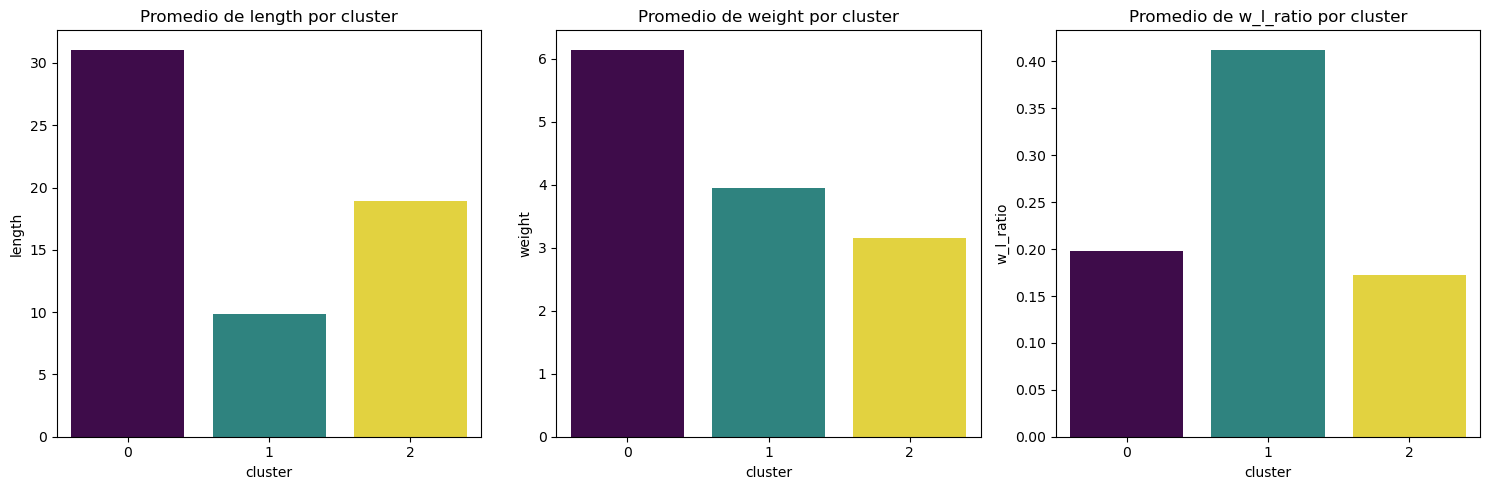


=== DISTRIBUCIÓN DE ESPECIES POR CLUSTER ===

Distribución de especies por cluster:


cluster,0,1,2
species,,,
Anabas testudineus,0,476,0
Coilia dussumieri,0,0,415
Otolithoides biauritus,0,0,468
Otolithoides pama,0,0,435
Pethia conchonius,0,475,0
Polynemus paradiseus,0,368,90
Puntius lateristriga,0,0,418
Setipinna taty,0,0,480
Sillaginopsis panijus,455,0,0



Porcentaje por especie dentro de cada cluster:


cluster,0,1,2
species,,,
Anabas testudineus,0.0%,36.1%,0.0%
Coilia dussumieri,0.0%,0.0%,18.0%
Otolithoides biauritus,0.0%,0.0%,20.3%
Otolithoides pama,0.0%,0.0%,18.9%
Pethia conchonius,0.0%,36.0%,0.0%
Polynemus paradiseus,0.0%,27.9%,3.9%
Puntius lateristriga,0.0%,0.0%,18.1%
Setipinna taty,0.0%,0.0%,20.8%
Sillaginopsis panijus,100.0%,0.0%,0.0%



Especie más representativa en cada cluster:
Cluster 0: Sillaginopsis panijus (100.0% de este cluster)
Cluster 1: Anabas testudineus (36.1% de este cluster)
Cluster 2: Setipinna taty (20.8% de este cluster)


In [12]:
if 'final_clusters' in locals() and optimal_k == 3:
    print("=== Reporte Detallado de los Clusters ===")

    # Obtener los centroides en escala original
    kmeans_final = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
    centroids_scaled = kmeans_final.cluster_centers_
    centroids_original = scaler.inverse_transform(centroids_scaled)
    centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
    centroids_df['cluster'] = centroids_df.index

    # Mostrar centroides con estadísticas clave
    print("\nCaracterísticas medias de cada cluster:")
    centroids_display = centroids_df.copy()
    centroids_display['size'] = final_clusters['cluster'].value_counts().sort_index().values
    display(centroids_display)

    # Funciones auxiliares para agrupamientos
    def clasificar_tamano(length, df):
        idx = np.digitize(length, [df['length'].quantile(0.33), df['length'].quantile(0.66)])
        idx = min(idx, 2)
        return ['pequeño', 'mediano', 'grande'][idx]

    def clasificar_w_l(w_l_ratio, df):
        idx = np.digitize(w_l_ratio, [df['w_l_ratio'].quantile(0.33), df['w_l_ratio'].quantile(0.66)])
        idx = min(idx, 2)
        return ['baja', 'moderada', 'alta'][idx]

    def clasificar_cuerpo(w_l_ratio, df):
        return 'alargado' if w_l_ratio < df['w_l_ratio'].median() else 'compacto'

    # Interpretacion ecológica del proyecto
    def get_ecological_interpretation(cluster_num, centroid):
        interpretations = [
            f"Juveniles/crecimiento lento. {centroid['length']:.1f}cm, relación {centroid['w_l_ratio']:.2f} sugiere etapa temprana.",
            f"Adultos jóvenes. Relación {centroid['w_l_ratio']:.2f} indica desarrollo activo.",
            f"Adultos maduros/ejemplares grandes. {centroid['weight']:.2f}kg sugiere madurez completa."
        ]
        return interpretations[cluster_num]

    # Para cada cluster
    for i in range(3):
        c = centroids_df.iloc[i]
        tamano = clasificar_tamano(c['length'], df)
        w_l = clasificar_w_l(c['w_l_ratio'], df)
        cuerpo = clasificar_cuerpo(c['w_l_ratio'], df)
        print(f"\nCluster {i}: Peces de tamaño {tamano} ({c['length']:.1f} cm) con relación peso/longitud {w_l} ({c['w_l_ratio']:.2f}). "
              f"Caracterizan peces con cuerpo {cuerpo}.")
        print(f"Interpretación ecológica: {get_ecological_interpretation(i, c)}")
    print(" ")

    # Visualización comparativa
    plt.figure(figsize=(15, 5))

    # Gráfico de barras para comparar características
    for i, feature in enumerate(['length', 'weight', 'w_l_ratio']):
        plt.subplot(1, 3, i+1)
        sns.barplot(data=centroids_df, x='cluster', y=feature, hue='cluster', palette='viridis', legend=False)
        plt.title(f'Promedio de {feature} por cluster')

    plt.tight_layout()
    plt.show()

    # Análisis mejorado de distribución de especies
    if 'species' in final_clusters.columns:
        print("\n=== DISTRIBUCIÓN DE ESPECIES POR CLUSTER ===")

        # Frecuencia absoluta
        print("\nDistribución de especies por cluster:")
        species_cluster = pd.crosstab(final_clusters['species'], final_clusters['cluster'])
        display(species_cluster.style.background_gradient(cmap='viridis'))

        # Frecuencia relativa por cluster
        print("\nPorcentaje por especie dentro de cada cluster:")
        species_dist = pd.crosstab(final_clusters['species'], final_clusters['cluster'], normalize='columns')
        display(species_dist.style.background_gradient(cmap='viridis').format("{:.1%}"))

        # Especie dominante por cluster
        print("\nEspecie más representativa en cada cluster:")
        dominant_species = []
        for cl in range(3):
            species_counts = final_clusters[final_clusters['cluster'] == cl]['species'].value_counts()
            if not species_counts.empty:
                top_species = species_counts.idxmax()
                percentage = species_counts.max() / species_counts.sum()
                dominant_species.append((cl, top_species, percentage))
                print(f"Cluster {cl}: {top_species} ({percentage:.1%} de este cluster)")

=== PRUEBA DIFERENTES VALORES DE K ===
Puedes probar con valores de k entre 1 y 4079

Métricas para k=5:
- Inercia (SSE): 1314.220
- Coeficiente de Silueta: 0.492


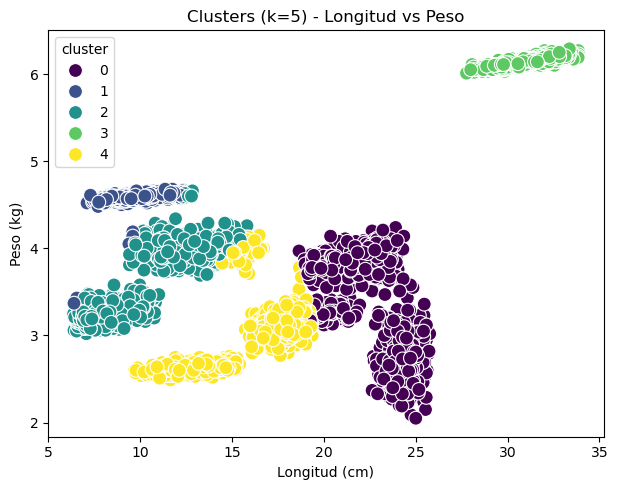


Estadísticas por cluster:


length                                                               \
          count       mean       std    min      25%     50%      75%    max   
cluster                                                                        
0         986.0  22.648266  1.843665  18.64  20.9325  23.010  24.2100  25.76   
1         479.0   9.498789  1.283730   6.39   8.5300   9.420  10.4050  12.36   
2         874.0  10.251384  2.507564   6.36   7.9700   9.885  12.4575  15.81   
3         455.0  31.066923  1.361024  27.75  30.0300  31.170  32.0900  33.86   
4        1286.0  16.194549  2.405363   9.69  14.1325  17.220  18.0700  19.36   

         weight            ...             w_l_ratio                      \
          count      mean  ...   75%   max     count      mean       std   
cluster                    ...                                             
0         986.0  3.302809  ...  3.83  4.24     986.0  0.147901  0.032062   
1         479.0  4.559457  ...  4.61  4.68     479.0  0.487871  0.059917   
2         874.0  3.611842  ...  3.98  4.66     874.0  0.365767  0.059854   
3         455.0  6.143143  ...  6.18  6.29     455.0  0.198264  0.007899   
4        1286.0  3.006423  ...  3.18  4.15    1286.0  0.188134  0.022836   

                                       
          min   25%   50%   75%   max  
cluster                                
0        0.08  0.12  0.16  0.17  0.21  
1        0.38  0.44  0.49  0.53  0.64  
2        0.27  0.32  0.36  0.41  0.51  
3        0.18  0.19  0.20  0.20  0.22  
4        0.15  0.17  0.18  0.19  0.27  

[5 rows x 24 columns]

Saliendo...


In [13]:
# Seccion de prueba de diferentes valores de k
def test_different_k():
    if 'X_scaled' in locals():
        print("Error: Primero debes cargar y preprocesar los datos.")
        return

    max_possible_k = len(X_scaled) - 1
    print("=== PRUEBA DIFERENTES VALORES DE K ===")
    print(f"Puedes probar con valores de k entre 1 y {max_possible_k}")

    while True:
        try:
            k = int(input(f"Ingresa el número de clusters a probar (1-{max_possible_k}, 0 para salir): "))
            if k == 0:
                print("Saliendo...")
                break
            if k < 1 or k > max_possible_k:
                print(f"Por favor ingresa un valor entre 1 y {max_possible_k}.")
                continue

            _ = cluster_with_k(k, X_scaled, df)

        except ValueError:
            print("Por favor ingresa un número válido.")

# Ejecutar la interfaz solo si tenemos datos
if 'X_scaled' in locals():
    test_different_k()
else:
    print("No se puede ejecutar la interfaz sin datos cargados.")